Hi, David. Given your RA and DEC coordinates, let's go find a light curve of your source, which happens to be a member of the M67 cluster! Maybe we can search for some periodic variability too!

In [1]:
RA=132.65420833333334
DEC=11.901305555555556

Ok, so first you'll need astroquery. If it's not installed, you'll want to install it. There is more information provided at the out the url below.
https://astroquery.readthedocs.io/en/latest/

In [15]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy.table import Table
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

import eleanor #requires tensorflow
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import pandas as pd

What missions does the astroquery Observations command search through?

In [5]:
print("missions:",Observations.list_missions())

missions: ['BEFS', 'EUVE', 'FUSE', 'GALEX', 'HLA', 'HLSP', 'HST', 'HUT', 'IUE', 'JWST', 'K2', 'K2FFI', 'Kepler', 'KeplerFFI', 'PS1', 'SPITZER_SHA', 'SWIFT', 'TESS', 'TUES', 'WUPPE']


Ok, wow. That is a lot of observations. We want K2 data, which spanned 3 years for M67 sources.  Let's limit our search to a radius of 5 arcseconds. For reference, Kepler/K2 has about 4 arcseconds per pixel.

In [6]:
obs_table = Observations.query_region("132.65420833333334 11.901305555555556",\
                                      radius=5*u.arcsec)
print(obs_table) 

intentType obs_collection provenance_name ...    obsid         distance     
---------- -------------- --------------- ... ----------- ------------------
   science          SWIFT              -- ... 15000733212                0.0
   science          SWIFT              -- ... 15000659258                0.0
   science          SWIFT              -- ... 15000733211                0.0
   science          SWIFT              -- ... 15000733213                0.0
   science          SWIFT              -- ... 15000741279                0.0
   science          SWIFT              -- ... 15000669055                0.0
   science          SWIFT              -- ... 15000741277                0.0
   science          SWIFT              -- ... 15000741278                0.0
   science          SWIFT              -- ... 15000741285                0.0
   science          SWIFT              -- ... 15000730964                0.0
       ...            ...             ... ...         ...                ...

Great, we have 39 observations within our search radius. Many of these correspond to data/missions that are not of interest here. For example, note the SWIFT observations listed above. We can look through specific rows too.

In [7]:
print(obs_table[26:31])

intentType obs_collection provenance_name ... srcDen    obsid    distance
---------- -------------- --------------- ... ------ ----------- --------
   science             K2              K2 ...    nan  9500493012      0.0
   science             K2              K2 ...    nan  9500493013      0.0
   science           HLSP         EVEREST ...    nan 18002410425      0.0
   science           HLSP           K2SFF ...    nan 18001844236      0.0
   science           HLSP           K2SFF ...    nan 18002044926      0.0


We see that just rows 26-31 correspond to Kepler. Rows 26 and 27 are raw K2 data. Row 28 contains EVEREST data --- a transit search that is listed as a high level sciece product (HLSP). Rows 29 and 30 are the K2SFF files. These correspond to K2 Extracted Lightcurves that A. Vanderburg generated. This is what Bob mentioned in our group meeting on July 21st, 2020. The first K2SFF file (18001844236) is from K2 Campaign 5, while the second (18002044926) is for K2 Campaign 16. Remember that K2 observations are broken up into a series of 18 campaigns. Your source was actually observed three times (Campaigns 5, 16, and 18).

Ok, so we have two obsid numbers that we need. Both correspond to the same target, denoted by an EPIC number that you will see in their headers when you download them. Let's download them both. The commands below will automatically save a bunch of files to a subfolder entitled "/mastDownload/HLSP." 

In [ ]:
obsid1 = '18001844236'
data_products = Observations.get_product_list(obsid1)
manifest = Observations.download_products(data_products)

In the subfolders are 8 files. The first is a tar.gz file, which can be ignored. 
Let's look at the original photometric data.

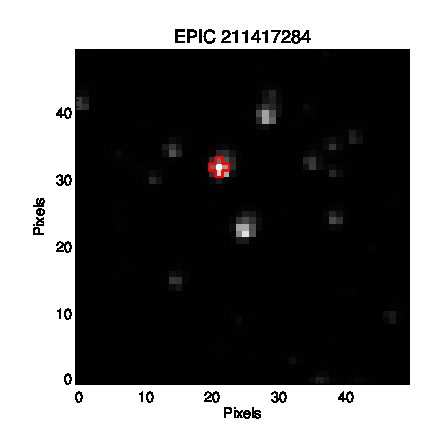

In [54]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_image.png')

We can see where this is situated in the K2 field of view with the following plot.

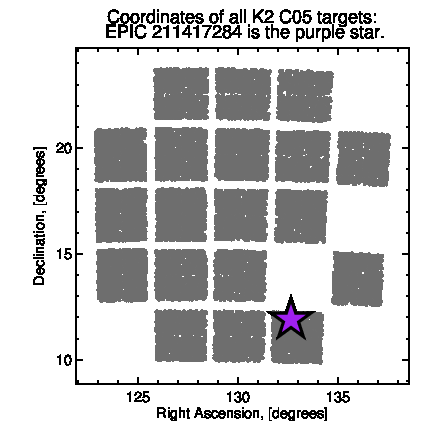

In [55]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_skypos.png')

If you'd like to plot the data yourself, it's contained in the following file: hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc-default-aper.txt --- you can just read in the columns and plot via matplotlib. However, Vanderburg already did this in the next png that we will display from the subfolder.

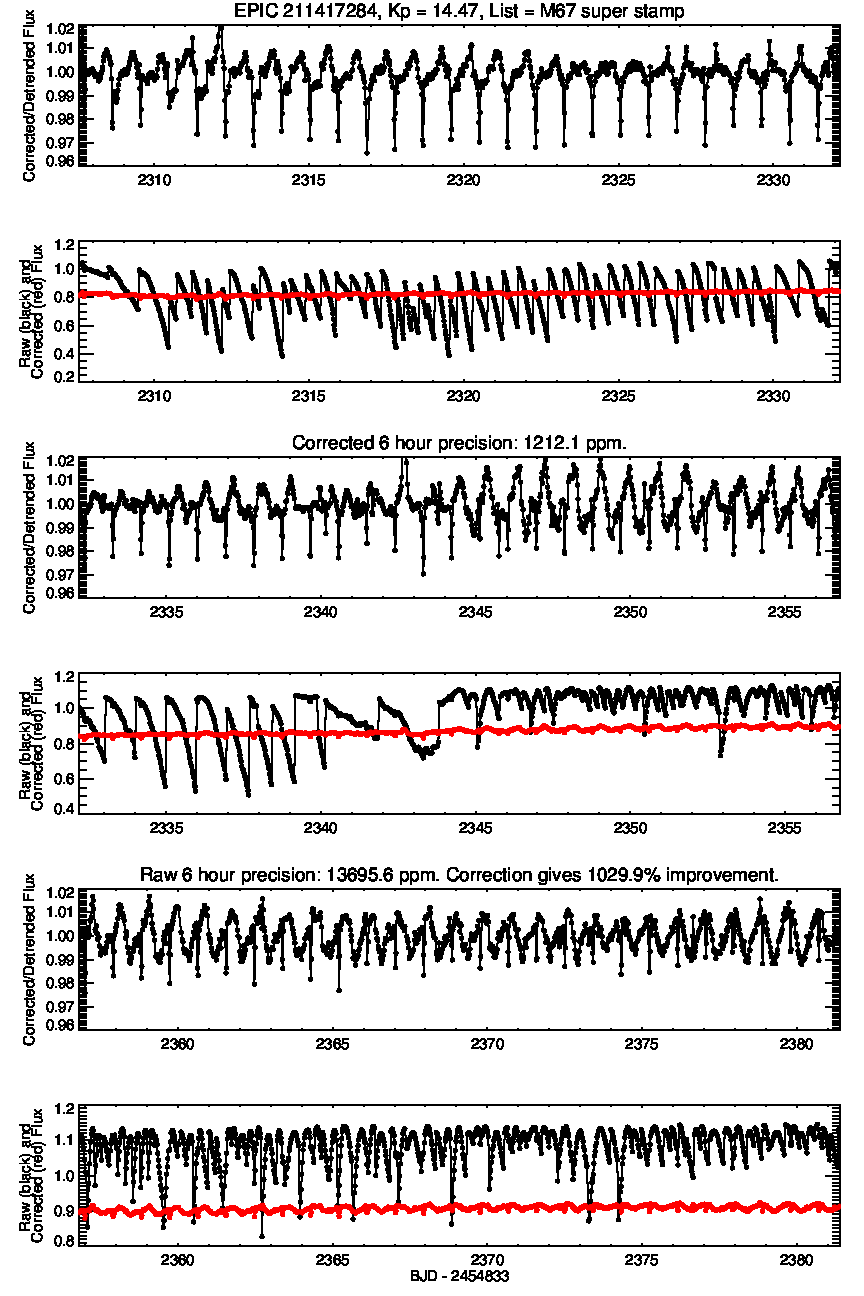

In [56]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc.png')

Below you'll see the median counts for this source over time. This is just a single campaign, btw (campaign 5), and not the entire 3-year window that is available if you string the three campaigns containing M67 together.

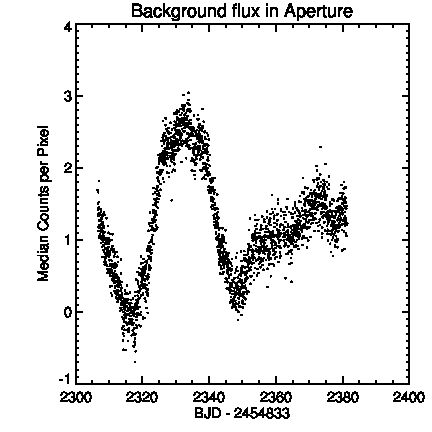

In [57]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_medians.png')

Ok, now let's take a moment to look at campaign 16...

In [59]:
obsid2 = '18002044926'
data_products = Observations.get_product_list(obsid2)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_correction.png with expected size 27356. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_image.png with expected size 8731. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_medians.png with expected size 6245. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_skypos.png with expected size 9184. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc.png with expected size 59621. [astroquery

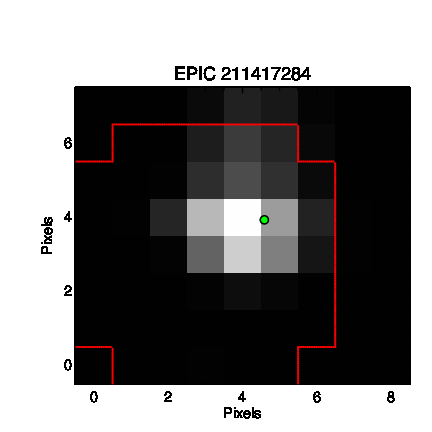

In [60]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_image.png')

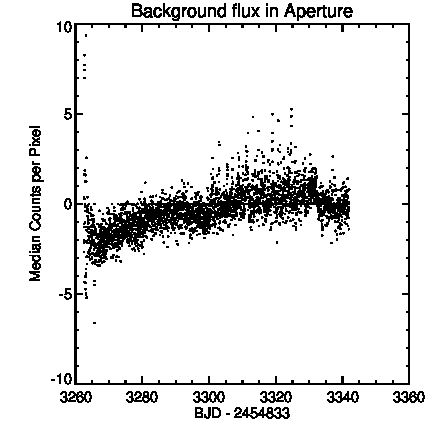

In [63]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_medians.png')

Ok, so that's all cool, but do we actually have a periodic variable here? We'll need to generate a phase-folded periodogram to see that. Ideally, we want to do this for the merged dataset to cover a longer observation window.

My favorite tool to do this is astrobase. You may need to download that using the url below. It's worth it. https://github.com/waqasbhatti/astrobase/blob/master/docs/index.rst

It's literally just a "pip install astrobase" command though...

In [9]:
import astrobase
from astrobase import periodbase, checkplot

[I 200723 21:50:26 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200723 21:50:26 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


First let us read in the text files and plot them to make some sense of the data

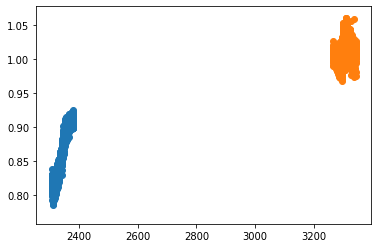

In [21]:
%matplotlib inline 
df1 = pd.read_csv('/Users/msoaresfurtado/Desktop/David/mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None)
date1=df1[0]
flux1=df1[1]
df2 = pd.read_csv('/Users/msoaresfurtado/Desktop/David/mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None)
date2=df2[0]
flux2=df2[1]

plt.scatter(date1,flux1)
plt.scatter(date2,flux2)

Let's just combine the two datasets before we run the periodogram

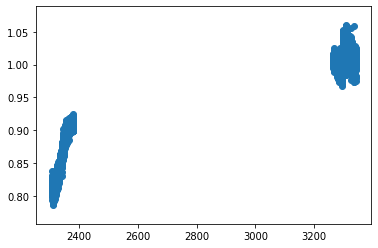

In [24]:
dates=np.concatenate((date1, date2), axis=0)
fluxes=np.concatenate((flux1, flux2), axis=0)
errs=fluxes*0.01 #we are making up an error just to run the thing...errors are not included in the file.
plt.scatter(dates,fluxes)

Ok, now we will search for periodic variability in this source. We will run three separate periodograms, each of which is useful to search for distinct light curve shapes (transits, contact binaries, and pulsational/rotational variables)...

In [ ]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs,magsarefluxes=True)
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,magsarefluxes=True)
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs,magsarefluxes=True)

[I 200723 21:54:32 zgls:600] using autofreq with 51718 frequency points, start P = 0.100, end P = 1034.451
[I 200723 21:54:32 zgls:607] using 8 workers...
[I 200723 21:55:25 kbls:821] min P: 0.1, max P: 100.0, nfreq: 4133668, minfreq: 0.01, maxfreq: 10.0
[I 200723 21:55:25 kbls:826] autofreq = True: using AUTOMATIC values for freq stepsize: 2.4167400110183997e-06, nphasebins: 200, min transit duration: 0.01, max transit duration: 0.4
[I 200723 21:55:25 kbls:865] using 8 workers...
[I 200723 21:55:25 kbls:899] worker 1: minfreq = 0.010000, nfreqs = 516708
[I 200723 21:55:25 kbls:899] worker 2: minfreq = 1.258749, nfreqs = 516708
[I 200723 21:55:25 kbls:899] worker 3: minfreq = 2.507498, nfreqs = 516708
[I 200723 21:55:25 kbls:899] worker 4: minfreq = 3.756247, nfreqs = 516708
[I 200723 21:55:25 kbls:899] worker 5: minfreq = 5.004996, nfreqs = 516708
[I 200723 21:55:25 kbls:899] worker 6: minfreq = 6.253744, nfreqs = 516708
[I 200723 21:55:25 kbls:899] worker 7: minfreq = 7.502493, nfreq

In [ ]:
fileout='M67_Source.pkl'
cpf = checkplot.checkplot_pickle([glsp,spdm,bls],dates,fluxes,errs,outfile=fileout,minbinelems=1, \
                                 objectinfo={'objectid': hdulist[0].header['HLSPTARG'],'ra': hdulist[0].header['RA_OBJ'],'decl': hdulist[0].header['DEC_OBJ'],'ndet': hdulist[0].header['TELAPSE']})

In [ ]:
cpfpng = checkplot.checkplot_pickle_to_png(fileout, 'checkplot-pickle.png')
Image('checkplot-pickle.png')